# Combine Features by PCA

In [22]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from load_data import *

In [23]:
price, listings, reviews = load_selected_data()

------------------------------
Selecting Features data...
------------------------------
------------------------------
Loading data...
------------------------------
Data loaded.


d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(i)
C:\Users\49173\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(country_list[i])
d:\Uni\WiSe21-22\Statistical and Deep L

Data cleansed.
Imputation done. No NaN's are left in the data.
Further Modifications are done.
Text and Open Street Data generated.
Image data loaded.
Have fun implementing your models.
Due to insignificant t-tests we dropped:
['Bathtub', 'Bed linens', 'Breakfast', 'Cleaning before checkout', 'Dishwasher', 'Elevator', 'Hair dryer', 'Indoor fireplace', 'Private entrance', 'Security cameras on property', 'Single level home', 'Stoves_available', 'Refridgerator_available', 'Body_soap_available', 'Garden_backyard_available', 'Children_Entertainment', 'Workspace', 'Gym_available', 'Coffee_machine_available', 'Dryer_available', 'Washer_available', 'Hot_tub_available', 'Pool_available', 'Wifi_available', 'AC_available', 'heating_available', 'Kitchen_available', 'Safe_available', 'Water_location', 'sound_system_available', 'TV_available', 'Outdoor_stuff', 'Game_consoles', 'Baby_friendly', 'Special_stuff', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown', 'property_type_Entire guesthouse', 'proper

## City Life

In [24]:
city_life = ["nightclubs", "sex_amenities", "bicycle_rentals", "casinos", "university", 
             "theatres_artscentre", "library", "taxi", "fast_foods", "restaurants", "bars",
             "cafes", "malls", "cinemas", "supermarkets"]

city_life_df = listings[city_life]

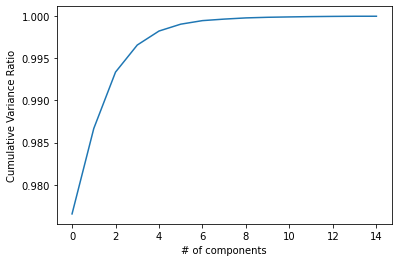

<Figure size 2880x2880 with 0 Axes>

In [25]:
pca = PCA().fit(city_life_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(40,40))
plt.show()

In [26]:
listings["city_life_pca"] = PCA(n_components = 1).fit_transform(city_life_df)
listings.drop(city_life, axis=1)

## Travel & Touristic 

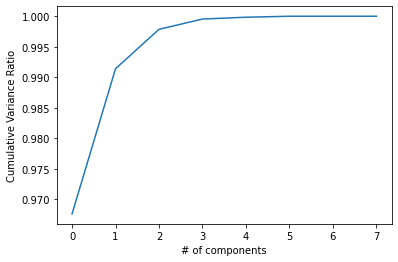

<Figure size 720x720 with 0 Axes>

In [29]:
travel_touristic = ["neighbourhood_cleansed_Dublin City", "in_city", "nearest_sight", "mean_dist_sight", "2nd_nearest_sight",
                    "3rd_nearest_sight", "nearest_travel_poss", "mean_dist_travel"]

travel_touristic_df = listings[travel_touristic]

pca = PCA().fit(travel_touristic_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [30]:
listings["travel_touristic_pca"] = PCA(n_components = 1).fit_transform(travel_touristic_df)
listings.drop(travel_touristic, axis=1)

,host_since,host_listings_count,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,availability_30,availability_60,...,contrast,no_img_bathroom,no_img_bedroom,no_img_dining,no_img_hallway,no_img_kitchen,no_img_living,no_img_others,city_life_pca,travel_touristic_pca
0,4112,3.0,53.291780,-6.257920,2,2.0,3,1125,0,0,...,0.982483,1.0,9.0,2.0,3.0,1.0,2.0,18.0,-82.304237,4468.501796
1,4112,3.0,53.292090,-6.256240,2,1.0,3,21,0,0,...,0.981019,2.0,8.0,1.0,5.0,1.0,4.0,17.0,-74.779437,4413.514859
2,3783,0.0,53.390270,-6.235470,1,1.0,2,21,5,17,...,0.977707,3.0,2.0,0.0,0.0,2.0,2.0,4.0,-88.495429,1054.656104
3,3780,2.0,53.283260,-6.191880,6,4.0,1,12,6,8,...,0.971464,1.0,4.0,0.0,0.0,1.0,1.0,16.0,-83.927219,9554.627689
4,3777,5.0,53.337440,-6.323630,5,3.0,4,365,11,18,...,0.991074,6.0,9.0,1.0,1.0,6.0,10.0,7.0,-77.905675,-2695.824057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,5,0.0,53.327305,-6.246794,2,1.0,14,35,0,19,...,0.991402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31.172770,-3936.122373
6836,2107,0.0,53.401550,-6.163366,1,1.0,1,365,25,55,...,0.974939,0.0,1.0,0.0,0.0,0.0,0.0,5.0,-88.197273,9379.004653
6837,5,0.0,53.328041,-6.246490,2,1.0,14,35,4,34,...,0.991402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.533958,-4076.810044
6838,5,0.0,53.327274,-6.248867,2,1.0,14,35,2,32,...,0.991402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31.730179,-4058.461454


## Accommodation Size

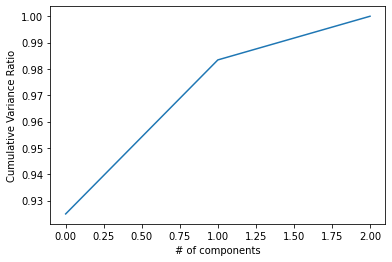

<Figure size 720x720 with 0 Axes>

In [47]:
acco = ["bedroom_number_1", "accommodates", "beds"]

accommodation_size_df = listings[acco]

pca = PCA().fit(accommodation_size_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [32]:
listings["accommodation_size_pc"] = PCA(n_components = 1).fit_transform(accommodation_size_df)
listings.drop(acco, axis=1)

,host_since,host_listings_count,latitude,longitude,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,no_img_bathroom,no_img_bedroom,no_img_dining,no_img_hallway,no_img_kitchen,no_img_living,no_img_others,city_life_pca,travel_touristic_pca,accommodation_size_pc
0,4112,3.0,53.291780,-6.257920,3,1125,0,0,22,202,...,1.0,9.0,2.0,3.0,1.0,2.0,18.0,-82.304237,4468.501796,-0.756398
1,4112,3.0,53.292090,-6.256240,3,21,0,0,21,296,...,2.0,8.0,1.0,5.0,1.0,4.0,17.0,-74.779437,4413.514859,-1.297204
2,3783,0.0,53.390270,-6.235470,2,21,5,17,35,310,...,3.0,2.0,0.0,0.0,2.0,2.0,4.0,-88.495429,1054.656104,-2.124812
3,3780,2.0,53.283260,-6.191880,1,12,6,8,31,106,...,1.0,4.0,0.0,0.0,1.0,1.0,16.0,-83.927219,9554.627689,3.785959
4,3777,5.0,53.337440,-6.323630,4,365,11,18,41,283,...,6.0,9.0,1.0,1.0,6.0,10.0,7.0,-77.905675,-2695.824057,2.267231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,5,0.0,53.327305,-6.246794,14,35,0,19,22,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31.172770,-3936.122373,-1.297204
6836,2107,0.0,53.401550,-6.163366,1,365,25,55,85,360,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,-88.197273,9379.004653,-2.124812
6837,5,0.0,53.328041,-6.246490,14,35,4,34,37,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.533958,-4076.810044,-1.297204
6838,5,0.0,53.327274,-6.248867,14,35,2,32,35,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31.730179,-4058.461454,-1.297204


## Host Listings count

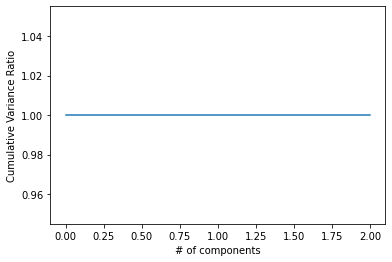

<Figure size 720x720 with 0 Axes>

In [62]:
host_listings = ["calculated_host_listings_count", "host_listings_count", "calculated_host_listings_count_private_rooms"]

host_listings_df = listings[host_listings]

pca = PCA().fit(host_listings_df)
r_cs = np.cumsum(pca.explained_variance_ratio_)
r_cs = np.round(r_cs)
plt.plot(r_cs)
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [52]:
pca.explained_variance_ratio_

array([9.99872112e-01, 1.05357136e-04, 2.25306624e-05])

In [51]:
listings["host_listings_pca"] = PCA(n_components = 1).fit_transform(host_listings_df)
listings.drop(acco, axis=1)

,host_since,host_listings_count,latitude,longitude,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,no_img_bedroom,no_img_dining,no_img_hallway,no_img_kitchen,no_img_living,no_img_others,city_life_pca,travel_touristic_pca,accommodation_size_pc,host_listings_pca
0,4112,3.0,53.291780,-6.257920,3,1125,0,0,22,202,...,9.0,2.0,3.0,1.0,2.0,18.0,-82.304237,4468.501796,-0.756398,-95.463545
1,4112,3.0,53.292090,-6.256240,3,21,0,0,21,296,...,8.0,1.0,5.0,1.0,4.0,17.0,-74.779437,4413.514859,-1.297204,-95.463545
2,3783,0.0,53.390270,-6.235470,2,21,5,17,35,310,...,2.0,0.0,0.0,2.0,2.0,4.0,-88.495429,1054.656104,-2.124812,-98.458192
3,3780,2.0,53.283260,-6.191880,1,12,6,8,31,106,...,4.0,0.0,0.0,1.0,1.0,16.0,-83.927219,9554.627689,3.785959,-96.546204
4,3777,5.0,53.337440,-6.323630,4,365,11,18,41,283,...,9.0,1.0,1.0,6.0,10.0,7.0,-77.905675,-2695.824057,2.267231,-93.507688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,5,0.0,53.327305,-6.246794,14,35,0,19,22,22,...,0.0,0.0,0.0,0.0,0.0,0.0,-31.172770,-3936.122373,-1.297204,-98.413664
6836,2107,0.0,53.401550,-6.163366,1,365,25,55,85,360,...,1.0,0.0,0.0,0.0,0.0,5.0,-88.197273,9379.004653,-2.124812,-98.627078
6837,5,0.0,53.328041,-6.246490,14,35,4,34,37,37,...,0.0,0.0,0.0,0.0,0.0,0.0,-19.533958,-4076.810044,-1.297204,-98.413664
6838,5,0.0,53.327274,-6.248867,14,35,2,32,35,35,...,0.0,0.0,0.0,0.0,0.0,0.0,-31.730179,-4058.461454,-1.297204,-98.413664


## Minimum nights

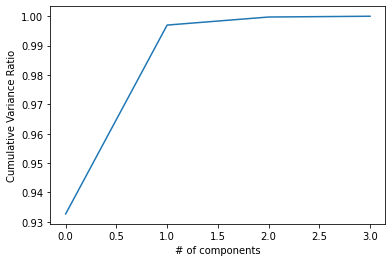

<Figure size 720x720 with 0 Axes>

In [57]:
min_nights = ["minimum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_nights_avg_ntm"]

min_nights_df = listings[min_nights]

pca = PCA().fit(min_nights_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [54]:
listings["min_nights_pca"] = PCA(n_components = 1).fit_transform(min_nights_df)
listings.drop(min_nights, axis=1)

,host_since,host_listings_count,latitude,longitude,accommodates,beds,maximum_nights,availability_30,availability_60,availability_90,...,no_img_dining,no_img_hallway,no_img_kitchen,no_img_living,no_img_others,city_life_pca,travel_touristic_pca,accommodation_size_pc,host_listings_pca,min_nights_pca
0,4112,3.0,53.291780,-6.257920,2,2.0,1125,0,0,22,...,2.0,3.0,1.0,2.0,18.0,-82.304237,4468.501796,-0.756398,-95.463545,-18.856916
1,4112,3.0,53.292090,-6.256240,2,1.0,21,0,0,21,...,1.0,5.0,1.0,4.0,17.0,-74.779437,4413.514859,-1.297204,-95.463545,-18.856916
2,3783,0.0,53.390270,-6.235470,1,1.0,21,5,17,35,...,0.0,0.0,2.0,2.0,4.0,-88.495429,1054.656104,-2.124812,-98.458192,-20.825907
3,3780,2.0,53.283260,-6.191880,6,4.0,12,6,8,31,...,0.0,0.0,1.0,1.0,16.0,-83.927219,9554.627689,3.785959,-96.546204,-22.794898
4,3777,5.0,53.337440,-6.323630,5,3.0,365,11,18,41,...,1.0,1.0,6.0,10.0,7.0,-77.905675,-2695.824057,2.267231,-93.507688,-16.288630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,5,0.0,53.327305,-6.246794,2,1.0,35,0,19,22,...,0.0,0.0,0.0,0.0,0.0,-31.172770,-3936.122373,-1.297204,-98.413664,2.801985
6836,2107,0.0,53.401550,-6.163366,1,1.0,365,25,55,85,...,0.0,0.0,0.0,0.0,5.0,-88.197273,9379.004653,-2.124812,-98.627078,-22.794898
6837,5,0.0,53.328041,-6.246490,2,1.0,35,4,34,37,...,0.0,0.0,0.0,0.0,0.0,-19.533958,-4076.810044,-1.297204,-98.413664,2.801985
6838,5,0.0,53.327274,-6.248867,2,1.0,35,2,32,35,...,0.0,0.0,0.0,0.0,0.0,-31.730179,-4058.461454,-1.297204,-98.413664,2.801985


## Availability

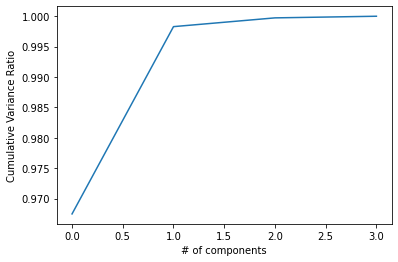

<Figure size 720x720 with 0 Axes>

In [55]:
avail = ["availability_365", "availability_30", "availability_60", "availability_90"]

avail_df = listings[avail]

pca = PCA().fit(avail_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
listings["availability_pca"] = PCA(n_components = 1).fit_transform(avail_df)
listings.drop(min_nights, axis=1)

## Review total

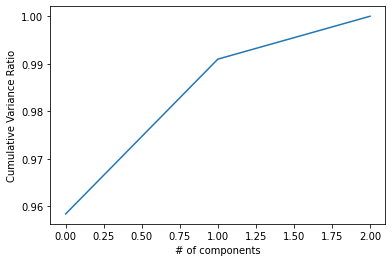

<Figure size 720x720 with 0 Axes>

In [63]:
review_total = ["review_scores_rating", "mean_compound", "most_pos_compound"]

review_total_df = listings[review_scores]

pca = PCA().fit(review_total_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [64]:
listings["review_total_pca"] = PCA(n_components = 1).fit_transform(review_total_df)
listings.drop(review_total, axis=1)

,host_since,host_listings_count,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,availability_30,availability_60,...,no_img_hallway,no_img_kitchen,no_img_living,no_img_others,city_life_pca,travel_touristic_pca,accommodation_size_pc,host_listings_pca,min_nights_pca,review_score_pca
0,4112,3.0,53.291780,-6.257920,2,2.0,3,1125,0,0,...,3.0,1.0,2.0,18.0,-82.304237,4468.501796,-0.756398,-95.463545,-18.856916,-0.272761
1,4112,3.0,53.292090,-6.256240,2,1.0,3,21,0,0,...,5.0,1.0,4.0,17.0,-74.779437,4413.514859,-1.297204,-95.463545,-18.856916,-0.294495
2,3783,0.0,53.390270,-6.235470,1,1.0,2,21,5,17,...,0.0,2.0,2.0,4.0,-88.495429,1054.656104,-2.124812,-98.458192,-20.825907,-0.241163
3,3780,2.0,53.283260,-6.191880,6,4.0,1,12,6,8,...,0.0,1.0,1.0,16.0,-83.927219,9554.627689,3.785959,-96.546204,-22.794898,-0.324841
4,3777,5.0,53.337440,-6.323630,5,3.0,4,365,11,18,...,1.0,6.0,10.0,7.0,-77.905675,-2695.824057,2.267231,-93.507688,-16.288630,-0.056833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,5,0.0,53.327305,-6.246794,2,1.0,14,35,0,19,...,0.0,0.0,0.0,0.0,-31.172770,-3936.122373,-1.297204,-98.413664,2.801985,0.353249
6836,2107,0.0,53.401550,-6.163366,1,1.0,1,365,25,55,...,0.0,0.0,0.0,5.0,-88.197273,9379.004653,-2.124812,-98.627078,-22.794898,-0.234611
6837,5,0.0,53.328041,-6.246490,2,1.0,14,35,4,34,...,0.0,0.0,0.0,0.0,-19.533958,-4076.810044,-1.297204,-98.413664,2.801985,0.165841
6838,5,0.0,53.327274,-6.248867,2,1.0,14,35,2,32,...,0.0,0.0,0.0,0.0,-31.730179,-4058.461454,-1.297204,-98.413664,2.801985,-0.097262


## Review Scores

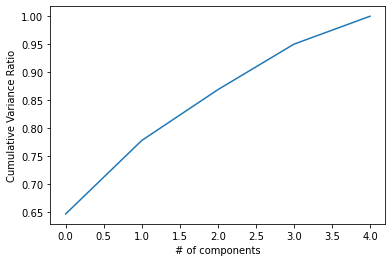

<Figure size 720x720 with 0 Axes>

In [70]:
review_scores = ["review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_cleanliness",
                 "review_scores_value"]

review_scores_df = listings[review_scores]

pca = PCA().fit(review_scores_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# not so nice

## Maximum Nights

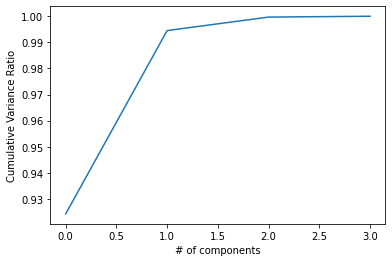

<Figure size 720x720 with 0 Axes>

In [71]:
max_nights = ["maximum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "maximum_nights_avg_ntm"]

max_nights_df = listings[max_nights]

pca = PCA().fit(max_nights_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [72]:
listings["max_nights_pca"] = PCA(n_components = 1).fit_transform(max_nights_df)
listings.drop(max_nights, axis=1)

,host_since,host_listings_count,latitude,longitude,accommodates,beds,minimum_nights,availability_30,availability_60,availability_90,...,no_img_kitchen,no_img_living,no_img_others,city_life_pca,travel_touristic_pca,accommodation_size_pc,host_listings_pca,min_nights_pca,review_score_pca,max_nights_pca
0,4112,3.0,53.291780,-6.257920,2,2.0,3,0,0,22,...,1.0,2.0,18.0,-82.304237,4468.501796,-0.756398,-95.463545,-18.856916,-0.272761,-920.244960
1,4112,3.0,53.292090,-6.256240,2,1.0,3,0,0,21,...,1.0,4.0,17.0,-74.779437,4413.514859,-1.297204,-95.463545,-18.856916,-0.294495,1285.799574
2,3783,0.0,53.390270,-6.235470,1,1.0,2,5,17,35,...,2.0,2.0,4.0,-88.495429,1054.656104,-2.124812,-98.458192,-20.825907,-0.241163,1285.799574
3,3780,2.0,53.283260,-6.191880,6,4.0,1,6,8,31,...,1.0,1.0,16.0,-83.927219,9554.627689,3.785959,-96.546204,-22.794898,-0.324841,1303.783632
4,3777,5.0,53.337440,-6.323630,5,3.0,4,11,18,41,...,6.0,10.0,7.0,-77.905675,-2695.824057,2.267231,-93.507688,-16.288630,-0.056833,598.408886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,5,0.0,53.327305,-6.246794,2,1.0,14,0,19,22,...,0.0,0.0,0.0,-31.172770,-3936.122373,-1.297204,-98.413664,2.801985,0.353249,1257.824371
6836,2107,0.0,53.401550,-6.163366,1,1.0,1,25,55,85,...,0.0,0.0,5.0,-88.197273,9379.004653,-2.124812,-98.627078,-22.794898,-0.234611,598.408886
6837,5,0.0,53.328041,-6.246490,2,1.0,14,4,34,37,...,0.0,0.0,0.0,-19.533958,-4076.810044,-1.297204,-98.413664,2.801985,0.165841,1257.824371
6838,5,0.0,53.327274,-6.248867,2,1.0,14,2,32,35,...,0.0,0.0,0.0,-31.730179,-4058.461454,-1.297204,-98.413664,2.801985,-0.097262,-415.445621


# Number of reviews on time

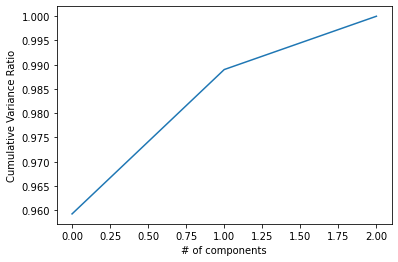

<Figure size 720x720 with 0 Axes>

In [74]:
review_amount = ["number_of_reviews_l30d", "number_of_reviews_ltm", "reviews_per_month"]

review_amount_df = listings[review_amount]

pca = PCA().fit(review_amount_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [75]:
listings["review_amount_pca"] = PCA(n_components = 1).fit_transform(review_amount_df)
listings.drop(review_amount, axis=1)

,host_since,host_listings_count,latitude,longitude,accommodates,beds,minimum_nights,maximum_nights,availability_30,availability_60,...,no_img_living,no_img_others,city_life_pca,travel_touristic_pca,accommodation_size_pc,host_listings_pca,min_nights_pca,review_score_pca,max_nights_pca,review_amount_pca
0,4112,3.0,53.291780,-6.257920,2,2.0,3,1125,0,0,...,2.0,18.0,-82.304237,4468.501796,-0.756398,-95.463545,-18.856916,-0.272761,-920.244960,-2.233004
1,4112,3.0,53.292090,-6.256240,2,1.0,3,21,0,0,...,4.0,17.0,-74.779437,4413.514859,-1.297204,-95.463545,-18.856916,-0.294495,1285.799574,-2.173834
2,3783,0.0,53.390270,-6.235470,1,1.0,2,21,5,17,...,2.0,4.0,-88.495429,1054.656104,-2.124812,-98.458192,-20.825907,-0.241163,1285.799574,0.119863
3,3780,2.0,53.283260,-6.191880,6,4.0,1,12,6,8,...,1.0,16.0,-83.927219,9554.627689,3.785959,-96.546204,-22.794898,-0.324841,1303.783632,2.131508
4,3777,5.0,53.337440,-6.323630,5,3.0,4,365,11,18,...,10.0,7.0,-77.905675,-2695.824057,2.267231,-93.507688,-16.288630,-0.056833,598.408886,4.542034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,5,0.0,53.327305,-6.246794,2,1.0,14,35,0,19,...,0.0,0.0,-31.172770,-3936.122373,-1.297204,-98.413664,2.801985,0.353249,1257.824371,-2.559335
6836,2107,0.0,53.401550,-6.163366,1,1.0,1,365,25,55,...,0.0,5.0,-88.197273,9379.004653,-2.124812,-98.627078,-22.794898,-0.234611,598.408886,-2.559335
6837,5,0.0,53.328041,-6.246490,2,1.0,14,35,4,34,...,0.0,0.0,-19.533958,-4076.810044,-1.297204,-98.413664,2.801985,0.165841,1257.824371,-2.559335
6838,5,0.0,53.327274,-6.248867,2,1.0,14,35,2,32,...,0.0,0.0,-31.730179,-4058.461454,-1.297204,-98.413664,2.801985,-0.097262,-415.445621,-2.559335
